# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [17]:
# Load libraries
import numpy as np
import pandas as pd
import nltk
import random
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
df = pd.read_csv("processed.csv", header=0)


In [20]:
df.head()

,text,sentiment,character_cnt,word_counts,characters_per_word,special_characters,num,result
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1,105,20,5.250000,2,0,Negative
1,What Happened To Apple Inc? http://t.co/FJEX...,0,101,10,10.100000,1,0,Neutral
2,Thank u @apple I can now compile all of the pi...,1,108,19,5.684211,1,0,Positive
3,The oddly uplifting story of the Apple co-foun...,0,115,17,6.764706,0,0,Neutral
4,@apple can i exchange my iphone for a differen...,0,77,15,5.133333,1,0,Neutral


In [21]:
df.isnull().sum()

text                   0
sentiment              0
character_cnt          0
word_counts            0
characters_per_word    0
special_characters     0
num                    0
result                 0
dtype: int64

In [22]:
df.result.value_counts()

Neutral     801
Negative    686
Positive    143
Name: result, dtype: int64

In [23]:
data = df.loc[:,'text'].tolist()
print(type(data))
print(len(data))

<class 'list'>
1630


In [24]:
data[:3]

['Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4',
 'What Happened To Apple Inc?   http://t.co/FJEXI3oP0U  #aapl #apple @MoneyPress http://t.co/wXKmmTMArW',
 'Thank u @apple I can now compile all of the pics that i communicate with in one place http://t.co/tq1lo09oyA']

In [25]:
for _ in range(len(data)):
    data[_] = re.sub(r'http\S+', '', data[_])

In [26]:
data[:3]

['Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4',
 'What Happened To Apple Inc?     #aapl #apple @MoneyPress ',
 'Thank u @apple I can now compile all of the pics that i communicate with in one place ']

In [27]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stech\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
stopwords = stopwords.words('english')

In [29]:
def tokenization_and_stemming(text):
    # Remove punctuation characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Create a instance of stem class
    stemmer = SnowballStemmer("english")
    
    clean_tokens = []
    for word in tokens:
        clean_tok = stemmer.stem(word).lower().strip()
        if clean_tok not in stopwords:
            clean_tokens.append(clean_tok)

    return clean_tokens

In [30]:
data[1]

'What Happened To Apple Inc?     #aapl #apple @MoneyPress '

In [31]:
tokenization_and_stemming(data[1])

['happen', 'appl', 'inc', 'aapl', 'appl', 'moneypress']

In [32]:
LDA = LatentDirichletAllocation(n_components=5)

In [33]:
tf_lda = CountVectorizer(
    max_df=0.99,
    max_features=500,
    min_df=0.01,
    tokenizer=tokenization_and_stemming,
    ngram_range=(1,1))


tf_matrix_lda = tf_lda.fit_transform(data) 


print ("In total, there are {} reviews and {} terms.".format(
    str(tf_matrix_lda.shape[0]), str(tf_matrix_lda.shape[1])
))

In total, there are 1630 reviews and 134 terms.


In [34]:
print(tf_matrix_lda.shape)


(1630, 134)


In [35]:
lda_feature_name = tf_lda.get_feature_names()


In [36]:
lda_output = LDA.fit_transform(tf_matrix_lda)
print(lda_output.shape)

(1630, 5)


In [37]:
topic_word = LDA.components_
print(topic_word.shape)

(5, 134)


In [38]:
topic_names = ["Topic" + str(i) for i in range(LDA.n_components)]

# Index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# Get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.32,0.03,0.32,0.03,0.30,0
Doc1,0.04,0.84,0.04,0.04,0.04,1
Doc2,0.30,0.04,0.04,0.58,0.04,3
Doc3,0.05,0.80,0.05,0.05,0.05,1
Doc4,0.05,0.05,0.05,0.80,0.05,3
Doc5,0.03,0.60,0.32,0.03,0.03,1
Doc6,0.04,0.29,0.59,0.04,0.04,2
Doc7,0.03,0.36,0.55,0.03,0.03,2
Doc8,0.03,0.03,0.03,0.34,0.55,4
Doc9,0.03,0.03,0.03,0.88,0.03,3


In [39]:
df_document_topic['topic'].value_counts().to_frame()


,topic
3,481
1,398
4,261
0,248
2,242


In [40]:

# Topic-word matrix
df_topic_words = pd.DataFrame(LDA.components_)

# Column and index
df_topic_words.columns = tf_lda.get_feature_names()
df_topic_words.index = topic_names

df_topic_words.head()

,aapl,amp,android,app,appl,back,batteri,becaus,best,buy,...,want,watch,week,whi,work,would,wtf,yall,year,yosemit
Topic0,0.200642,10.681654,0.202429,0.202053,268.487602,8.058156,6.705559,7.381787,0.231706,4.666011,...,24.032328,0.201233,15.760104,0.408829,24.494856,0.202138,0.201501,0.201842,0.201303,0.203463
Topic1,528.196225,14.790015,10.849771,0.200754,366.221264,0.222848,0.200081,0.201262,8.188094,28.726510,...,0.202685,24.339465,6.627031,0.201502,0.200486,0.200686,0.200018,0.200007,4.679768,0.200564
Topic2,0.201078,0.201453,3.193081,0.200601,276.387797,0.203788,0.201050,11.014854,0.200204,0.201935,...,5.363245,16.057439,0.200995,81.327199,0.202104,14.555163,4.281960,0.202300,0.201446,12.838586
Topic3,0.201445,12.331091,2.270304,71.194860,528.486204,15.066352,26.688175,0.201079,11.160487,0.201843,...,0.200995,0.200919,0.203323,0.201768,30.890552,3.838905,4.016575,0.200437,25.289357,6.555227
Topic4,0.200611,24.995787,3.484415,0.201732,287.417132,10.448856,0.205135,0.201017,0.219510,0.203701,...,0.200748,0.200945,0.208549,9.860703,0.212003,0.203108,14.299946,20.195414,1.628125,0.202159


In [41]:

# Print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topic_words = []
    # For each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tf_lda, lda_model=LDA, n_words=20)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,appl,make,thank,iphon,updat,phone,io,ipad,custom,new,today,last,great,charger,work,want,month,servic,screen,onli
Topic 1,aapl,appl,iphon,inc,stock,googl,decemb,rt,price,new,buy,cook,tim,watch,market,tech,ipad,profit,sale,jpdeslog
Topic 2,appl,fuck,rt,whi,ipod,delet,phone,pay,hey,music,much,doe,peopl,let,take,emoji,use,think,watch,day
Topic 3,appl,iphon,app,need,steve,job,like,go,one,free,via,work,u,onerepubl,batteri,year,hate,mac,realli,comput
Topic 4,appl,get,shit,store,phone,fix,rt,itun,suck,amp,togeth,charger,ur,die,product,got,still,yall,even,dear


In [42]:
df_document_topic["sentiment"] = df.result.values

In [43]:
df_document_topic.groupby('topic')['sentiment'].value_counts()

topic  sentiment
0      Negative     146
       Neutral       64
       Positive      38
1      Neutral      345
       Negative      30
       Positive      23
2      Negative     160
       Neutral       68
       Positive      14
3      Neutral      258
       Negative     173
       Positive      50
4      Negative     177
       Neutral       66
       Positive      18
Name: sentiment, dtype: int64

In the above cell output, Topic 1 shows that it has high ratio of negative reviews.
Topic 2 has high neutral review rate.

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [201]:
# Write your code here

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [202]:
def load_data(path,file_name):
    df = pd.read_csv(file_name, header=0)
    print("Total Number of Documents:",len(df))
    documents_list = df.loc[:,'text'].tolist()
    return documents_list

In [203]:
document_list=load_data("","processed.csv")
print(document_list)

Total Number of Documents: 1630
['Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4', 'What Happened To Apple Inc?   http://t.co/FJEXI3oP0U  #aapl #apple @MoneyPress http://t.co/wXKmmTMArW', 'Thank u @apple I can now compile all of the pics that i communicate with in one place http://t.co/tq1lo09oyA', 'The oddly uplifting story of the Apple co-founder who sold his stake for $800 \r\n$AAPL #aapl\r\nhttp://t.co/CiZbVR05PJ', '@apple can i exchange my iphone for a different color lmao  i changed my mind', 'RT @JPDesloges: Apple Acted Unfairly In Suppressing Digital Music Competition: Paul Kedrosky $AAPL #aapl\r\nhttp://t.co/XTbFhpbYf7', "Let's not forget that press effects stock @Apple to Defend Against iPod Antitrust Suit http://t.co/pqJ0bKIMb8", 'Apple Inc. Deleted Songs From Rival Services From iPods http://t.co/dQwDFpcc4x #AAPL', "@TeamCavuto @Apple They're staging a die in ar an Apple store while being on their iPhone.", 'Happy M

In [222]:
# def preprocess_data(doc_set):
#     tokenizer = RegexpTokenizer(r'\w+')
#     # Create p_stemmer of class PorterStemmer
#     p_stemmer = PorterStemmer()
#     # list for tokenized documents in loop
#     texts = []
#     # loop through document list
#     for i in doc_set:
#         # clean and tokenize document string
#         raw = i.lower()
# #         print(raw)
        
# #         print(raw)
#         tokens = tokenizer.tokenize(raw)
# #         print(tokens)
#         # remove stop words from tokens
#         stopped_tokens = [i for i in tokens if not i in stopwords]
#         print(stopped_tokens)
#         # stem tokens
#         stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#         print(stemmed_tokens)
#         # add tokens to list
#         texts.append(stemmed_tokens)
#         print(texts)
#     return texts

In [223]:
def preprocess_data(doc_set):
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        raw = re.sub(r'http\S+', '', raw)
        raw = re.sub(r"[^a-zA-Z]", " ", raw)
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [224]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [225]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [226]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [231]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.legend(("coherence_values"), loc='best')
    plt.show()

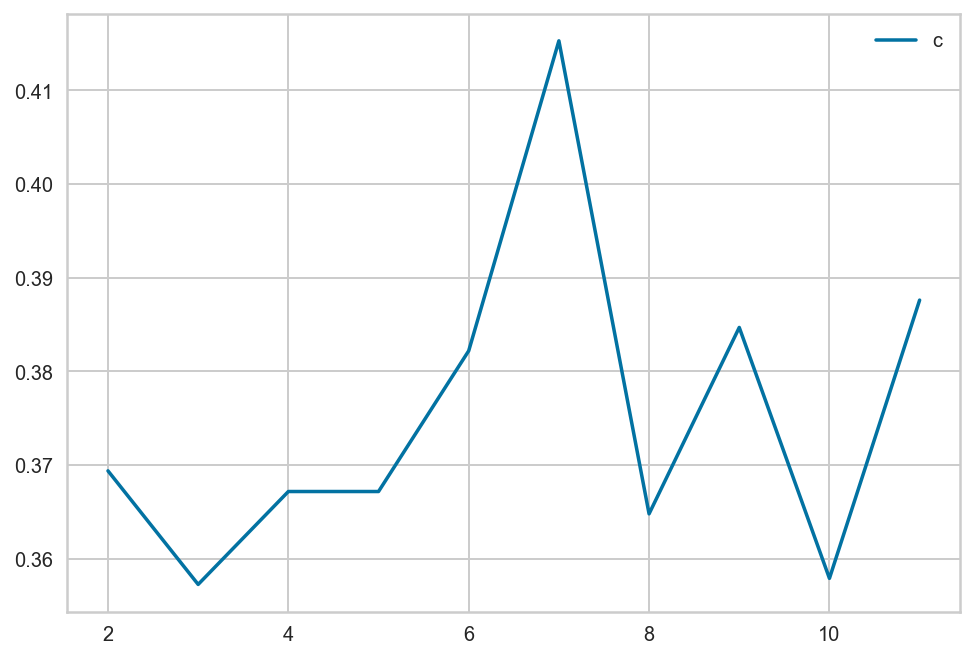

In [232]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [229]:
number_of_topics=5
words=10
document_list=load_data("","processed.csv")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 1630
[(0, '-0.916*"appl" + -0.265*"aapl" + -0.175*"iphon" + -0.078*"rt" + -0.067*"fuck" + -0.057*"phone" + -0.044*"new" + -0.041*"get" + -0.039*"inc" + -0.039*"decemb"'), (1, '-0.926*"aapl" + 0.266*"appl" + -0.096*"inc" + 0.090*"fuck" + -0.080*"stock" + 0.072*"phone" + -0.049*"jpdeslog" + -0.047*"iphon" + 0.038*"shit" + -0.035*"price"'), (2, '0.940*"iphon" + -0.149*"appl" + 0.110*"decemb" + 0.107*"plu" + -0.082*"aapl" + -0.065*"inc" + 0.061*"rumor" + -0.046*"rt" + -0.043*"stock" + 0.035*"sale"'), (3, '0.822*"fuck" + 0.332*"phone" + 0.210*"shit" + 0.178*"rt" + -0.128*"appl" + 0.096*"u" + 0.092*"get" + 0.089*"aapl" + 0.084*"im" + -0.075*"decemb"'), (4, '-0.910*"rt" + 0.231*"fuck" + -0.117*"jpdeslog" + -0.098*"get" + 0.090*"inc" + -0.075*"charger" + 0.062*"stock" + 0.060*"appl" + -0.042*"new" + -0.041*"holiday"')]


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

### Write your answer here (no code needed for this question)
The methodologies of Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA) are useful for dealing with NLP 
issues. The input for both LSA and LDA is the same: a bag of words in matrix format. LSA is concerned with lowering matrix 
dimension, whereas LDA is concerned with solving topic modelling difficulties.
We can easily seen the difference in the output of both LSA and LDA. 
LSA is better then LDA in terms of simplicity, speed, and accuracy. The simplest way is the LSA algorithm, which is straightforward to learn and apply. In comparison to the vector space model, it also produces superior outcomes. Because it simply includes document term matrix decomposition, it is quicker than other current techniques. In LSA term-frequency and inverse document frequency is used. The primary idea behind Tf/IDF in Latent Semantic Analysis is to supply each word count and frequency of uncommon words in order to assign weights based on their rarity. TF/IDF is better to traditional counting of occurrence of the word since it merely counts the frequency without categorization. 